In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


# **Loading Data**

In [2]:
data = pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")
data.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [3]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [4]:
df = data.drop(columns =['A_id'])

In [5]:
df.tail()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [6]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df.isnull().value_counts()

Size   Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  Quality
False  False   False      False        False      False     False    False      4000
True   True    True       True         True       True      False    True          1
Name: count, dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df_q = df['Quality'].value_counts()
df_q

Quality
good    2004
bad     1996
Name: count, dtype: int64

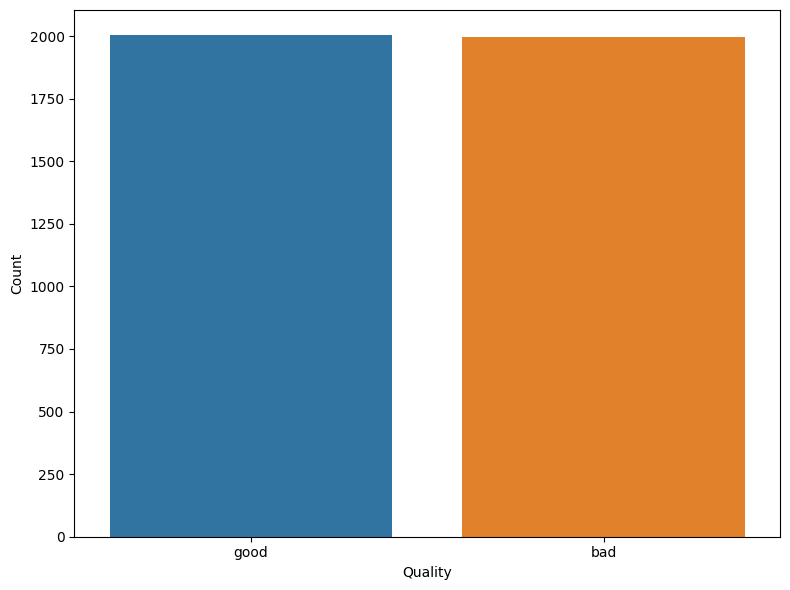

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(x =df['Quality'],data=df)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.tight_layout()

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

label = LabelEncoder()
label.fit(df['Quality'])
label.classes_

array(['bad', 'good'], dtype=object)

In [12]:
transformed = label.transform(df['Quality'])
transformed

array([1, 1, 0, ..., 0, 1, 1])

# Features Selection

In [13]:
features = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

label = [transformed]

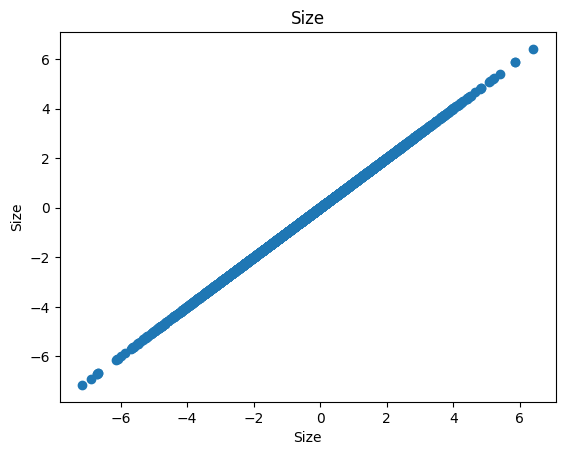

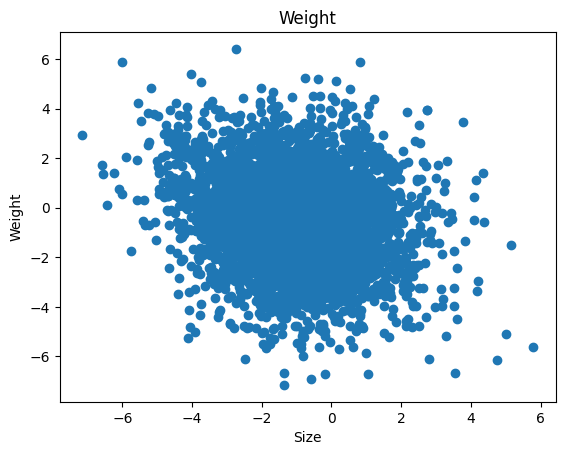

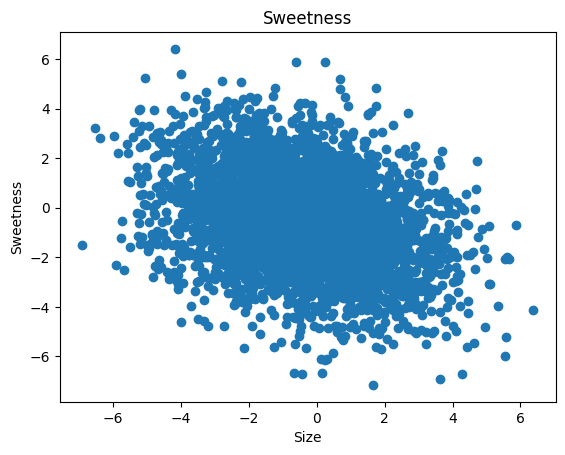

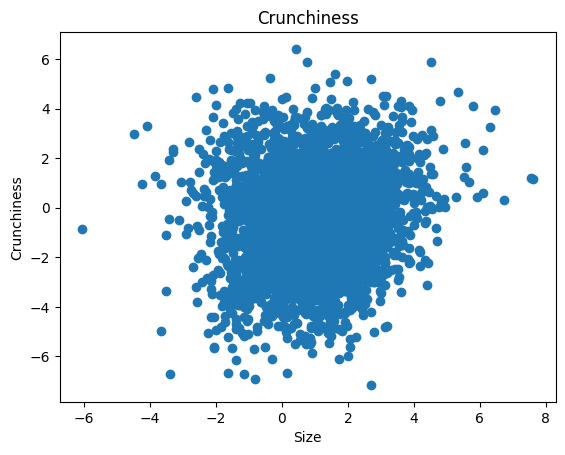

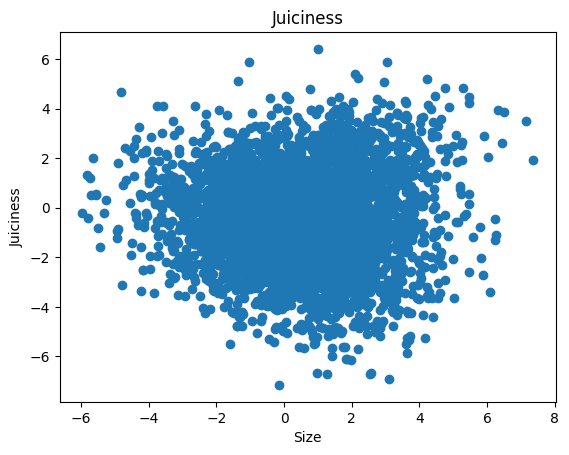

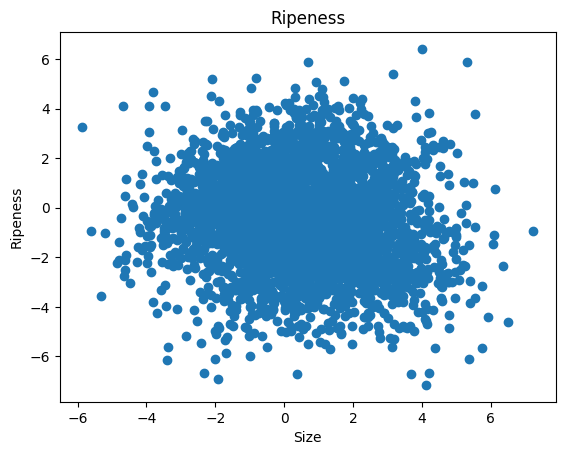

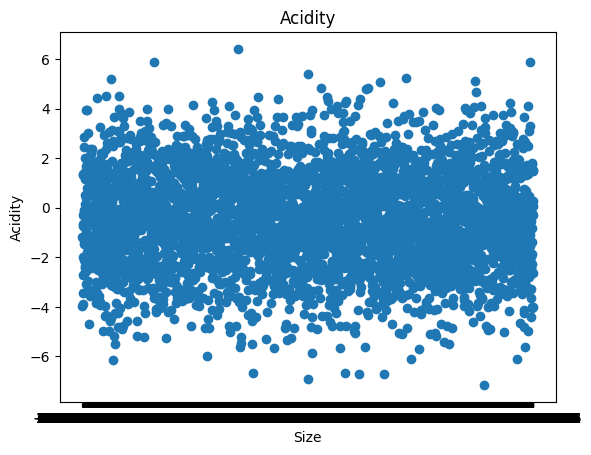

In [14]:
for col in features:
    plt.scatter(df[col],df['Size'])
    plt.ylabel(col)
    plt.xlabel('Size')
    plt.title(col)
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score


In [16]:
y = transformed
x = df[features]

x.head()



,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [17]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x))
X.head()

,0,1,2,3,4,5,6
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 50)

print('Training Cases:  %d\nTest Cases : %d'% (X_train.shape[0],X_test.shape[0]))

Training Cases:  2800
Test Cases : 1200


In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(X_train,y_train)
model

KNeighborsClassifier()

In [20]:
predictions = model.predict(X_test)


print('Predictions :',predictions[:15])
print('Actual values :', y_test[:15])

Predictions : [1 0 1 0 1 0 1 0 0 1 1 1 0 0 1]
Actual values : [1 0 1 0 1 0 1 0 0 1 1 1 0 0 1]


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       586
           1       0.91      0.89      0.90       614

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200

Accuracy =  90.17  %
KN Neighbors Confusion Matrix


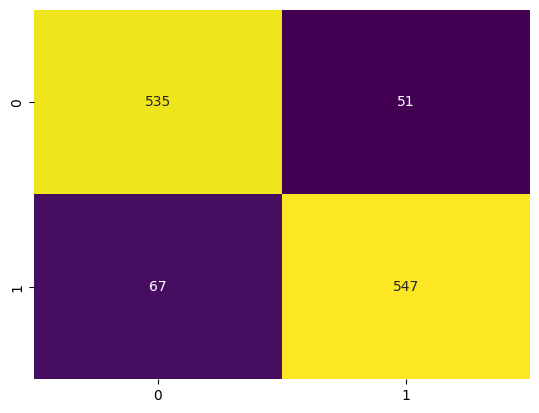

In [21]:
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
model_train = round(accuracy_score(y_train,model.predict(X_train))*100,2)
model_test= round(accuracy_score(y_test,predictions)*100,2)
print('Accuracy = ' , model_test,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='viridis', cbar=False)
print('KN Neighbors Confusion Matrix')